In [23]:

# Importación de librerías para análisis de datos EV Charging Stations

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd
from shapely.geometry import Point
import folium


from datetime import datetime


plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [24]:

# Carga y exploración inicial del dataset

df = pd.read_csv('ev_stations.csv')


print(" Vista previa del dataset:")
print(df.head(), "\n")


print("ℹ Información del dataset:")
print(df.info(), "\n")


print(" Estadísticas descriptivas:")
print(df.describe(), "\n")


print(" Valores nulos por columna:")
print(df.isnull().sum(), "\n")


print(f" El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")


print(" Columnas del dataset:")
print(df.columns.tolist(), "\n")


print(" Número de valores únicos por columna:")
print(df.nunique(), "\n")


 Vista previa del dataset:
       id                                              title  \
0  462769                    Electra - Wambrechies - Volfoni   
1  462768                       Electra - Tourcoing - Action   
2  462767  Electra - Bondues - Sure Hotel by Best Western...   
3  462766                 Electra - Bousbecque - Intermarché   
4  462765                    Electra - Halluin - Intermarché   

                 address         town state postcode country        lat  \
0    81 Av. Clément Ader  Wambrechies   NaN    59118      FR  50.685653   
1     185 rue du Touquet    Tourcoing   NaN    59200      FR  50.723171   
2  3 Av. Henri Becquerel      Bondues   NaN    59910      FR  50.722535   
3              Rue Auger   Bousbecque   NaN    59166      FR  50.770139   
4     Boulevard de Roncq      Halluin   NaN    59250      FR  50.769938   

        lon operator       status  num_connectors  \
0  3.062410  Electra  Operational               2   
1  3.180636  Electra  Operation

In [25]:

# Exploración complementaria

print(" Países en el dataset:")
print(df['country'].value_counts(), "\n")


print(" Principales operadores:")
print(df['operator'].value_counts().head(10), "\n")


print(" Estado de las estaciones:")
print(df['status'].value_counts(), "\n")


print(" Distribución de número de conectores:")
print(df['num_connectors'].describe(), "\n")


print(" Rango de fechas en 'date_added':")
print(f"Desde {df['date_added'].min()} hasta {df['date_added'].max()}\n")


print(" Tipos de conectores más comunes:")
all_connectors = df['connector_types'].dropna().str.split('|').explode()
print(all_connectors.value_counts().head(10), "\n")


 Países en el dataset:
country
CA    4135
US    2266
ES     888
RU     392
MY     377
TR     377
DK     296
BR     199
IT     134
FR     112
NL      95
IE      78
CZ      69
DE      69
AT      43
AU      39
GB      36
GE      29
IN      27
EG      25
BE      21
LT      21
FI      20
CH      17
JP      16
PL      13
HU      13
SE      13
RO      11
AZ      11
CR      10
IL      10
TN       9
ID       9
JO       8
MX       8
CO       8
DO       7
UA       7
LV       7
HR       7
SI       7
LI       4
EC       4
PA       4
SK       4
EE       3
ZA       3
AE       3
GR       3
GT       2
AM       2
LU       2
VN       2
NP       2
LK       2
NZ       2
CY       2
PY       2
MA       2
BG       2
RS       1
BA       1
MT       1
PT       1
JM       1
CN       1
UY       1
UZ       1
MD       1
AL       1
NO       1
Name: count, dtype: int64 

 Principales operadores:
operator
Circuit Electrique              1979
ChargePoint                     1275
flo                              724
(Unk

C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1632478845.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1632478845.py:13: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


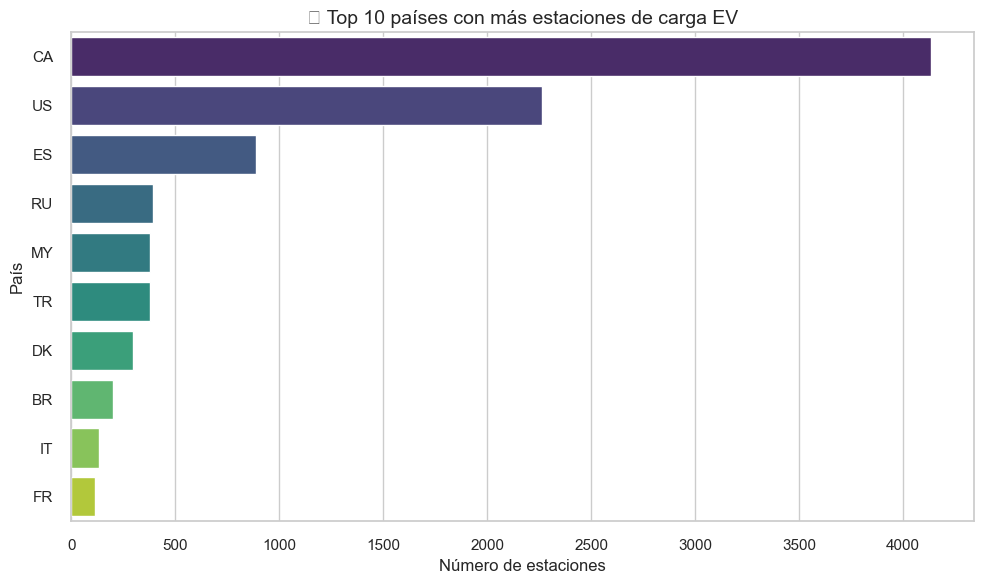

In [26]:

# Visualización 1: Top 10 países por número de estaciones



top_countries = df['country'].value_counts().head(10)


plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("🌍 Top 10 países con más estaciones de carga EV", fontsize=14)
plt.xlabel("Número de estaciones")
plt.ylabel("País")
plt.tight_layout()
plt.show()


In [27]:

# Visualización 2: Mapa global interactivo con Folium



m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")


sample_df = df.sample(n=1000, random_state=42)  

for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        popup=f"{row['title']}<br>{row['operator']}<br>{row['country']}",
        color="blue",
        fill=True,
        fill_opacity=0.7
    ).add_to(m)


m.save("mapa_ev_stations.html")
print(" Mapa generado: abre 'mapa_ev_stations.html' en tu navegador para visualizarlo.")


 Mapa generado: abre 'mapa_ev_stations.html' en tu navegador para visualizarlo.


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\2830737180.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


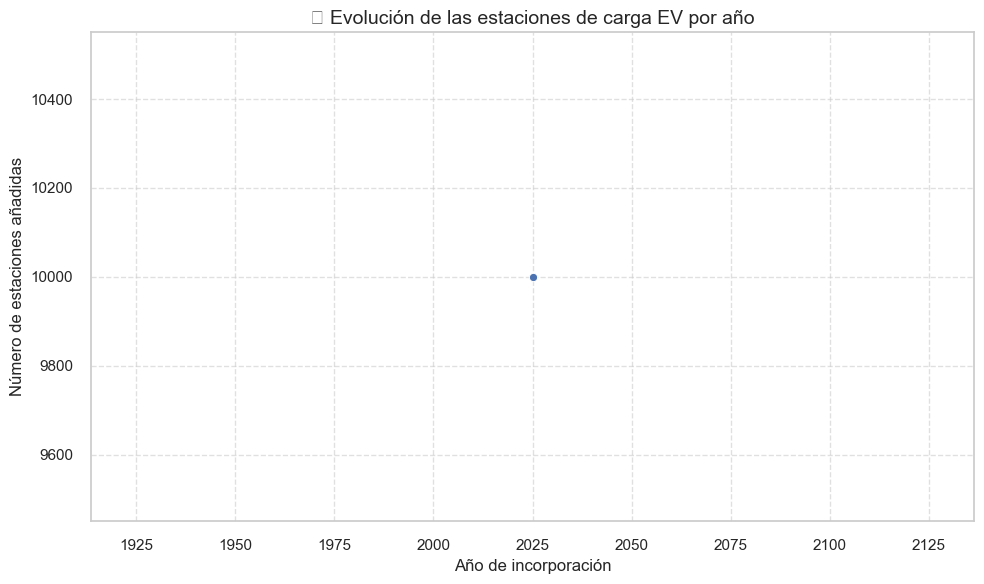

In [28]:

# Visualización 3: Evolución temporal de las estaciones de carga

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['year'] = df['date_added'].dt.year


stations_by_year = df['year'].value_counts().sort_index()


plt.figure(figsize=(10,6))
sns.lineplot(x=stations_by_year.index, y=stations_by_year.values, marker="o", linewidth=2.5)
plt.title("📈 Evolución de las estaciones de carga EV por año", fontsize=14)
plt.xlabel("Año de incorporación")
plt.ylabel("Número de estaciones añadidas")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [29]:

print(df['date_added'].dt.year.value_counts().sort_index())


date_added
2025    10000
Name: count, dtype: int64


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1414179027.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_connectors.values, y=top_connectors.index, palette="mako")
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1414179027.py:21: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


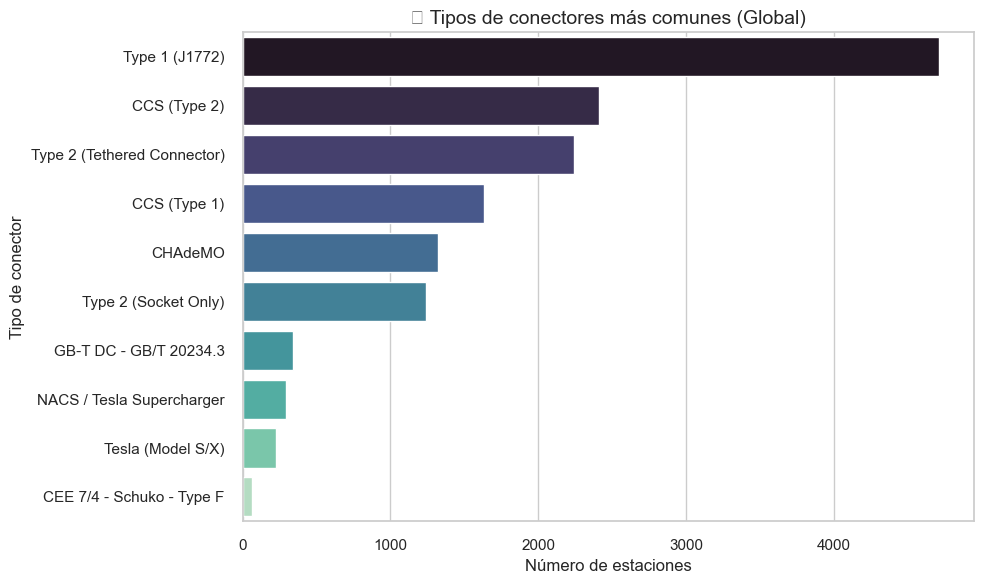

C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1414179027.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=connectors_by_country.values, y=connectors_by_country.index, palette="viridis")
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1414179027.py:38: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


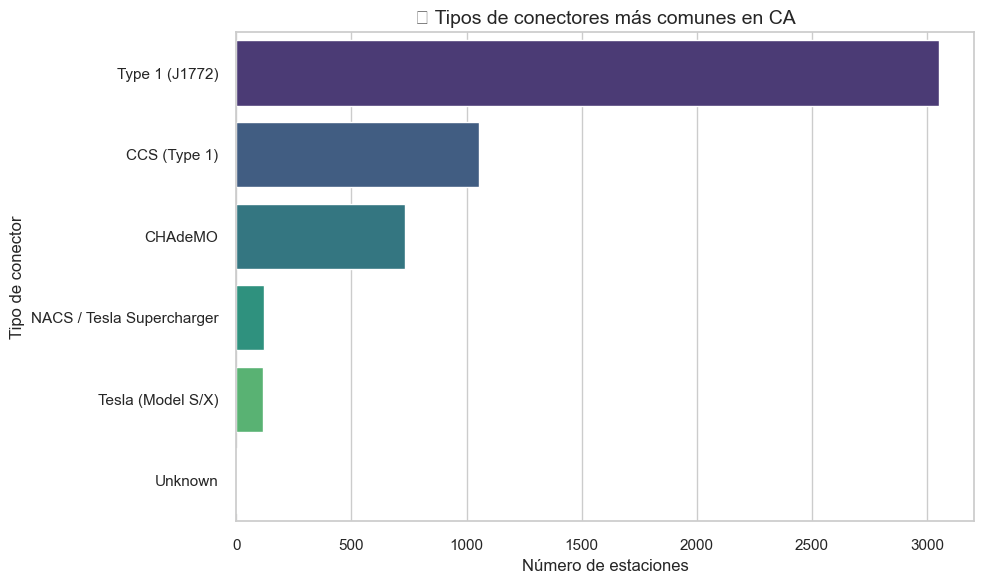

In [30]:

# Visualización 4: Tipos de conectores más comunes (global y por país)



df['connector_types'] = df['connector_types'].fillna('Unknown')


connectors_expanded = df.assign(connector=df['connector_types'].str.split('|')).explode('connector')


connectors_expanded['connector'] = connectors_expanded['connector'].str.strip()


top_connectors = connectors_expanded['connector'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_connectors.values, y=top_connectors.index, palette="mako")
plt.title("🔌 Tipos de conectores más comunes (Global)", fontsize=14)
plt.xlabel("Número de estaciones")
plt.ylabel("Tipo de conector")
plt.tight_layout()
plt.show()


# Ejemplo: analizar los tipos más usados en Canadá (CA)
country_focus = 'CA'
connectors_by_country = (
    connectors_expanded[connectors_expanded['country'] == country_focus]['connector']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=connectors_by_country.values, y=connectors_by_country.index, palette="viridis")
plt.title(f"🔋 Tipos de conectores más comunes en {country_focus}", fontsize=14)
plt.xlabel("Número de estaciones")
plt.ylabel("Tipo de conector")
plt.tight_layout()
plt.show()


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1401717626.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=connectors_by_operator.values, y=connectors_by_operator.index, palette="crest")
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


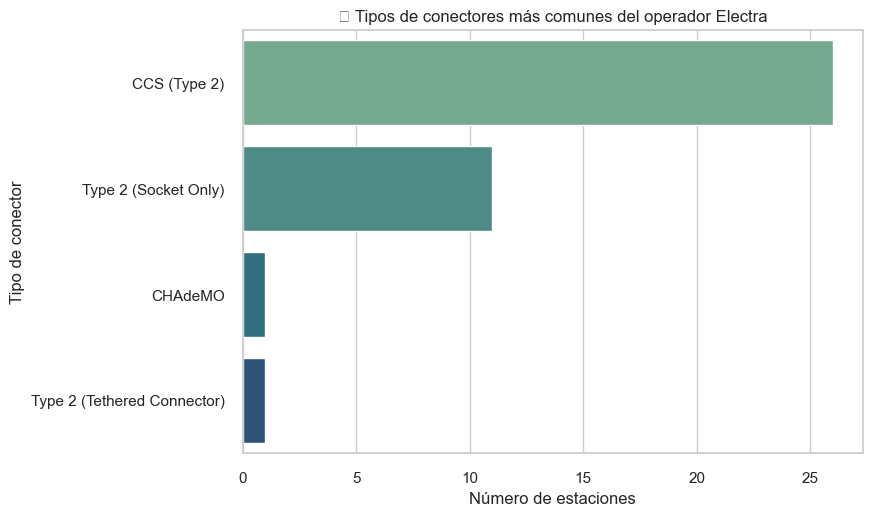

In [31]:

operator_focus = 'Electra'
connectors_by_operator = (
    connectors_expanded[connectors_expanded['operator'] == operator_focus]['connector']
    .value_counts()
    .head(10)
)

sns.barplot(x=connectors_by_operator.values, y=connectors_by_operator.index, palette="crest")
plt.title(f"🔌 Tipos de conectores más comunes del operador {operator_focus}")
plt.xlabel("Número de estaciones")
plt.ylabel("Tipo de conector")
plt.show()


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\2778254933.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\2778254933.py:11: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


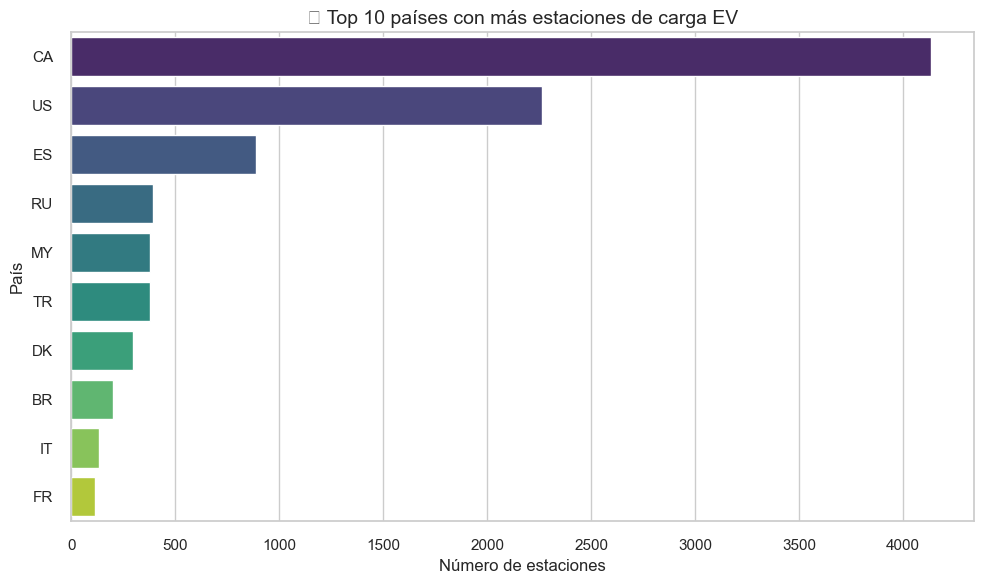

In [32]:

# 1. Países con más estaciones de carga EV


top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("🌍 Top 10 países con más estaciones de carga EV", fontsize=14)
plt.xlabel("Número de estaciones")
plt.ylabel("País")
plt.tight_layout()
plt.show()


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1115505393.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values, y=top_operators.index, palette="crest")
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1115505393.py:11: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


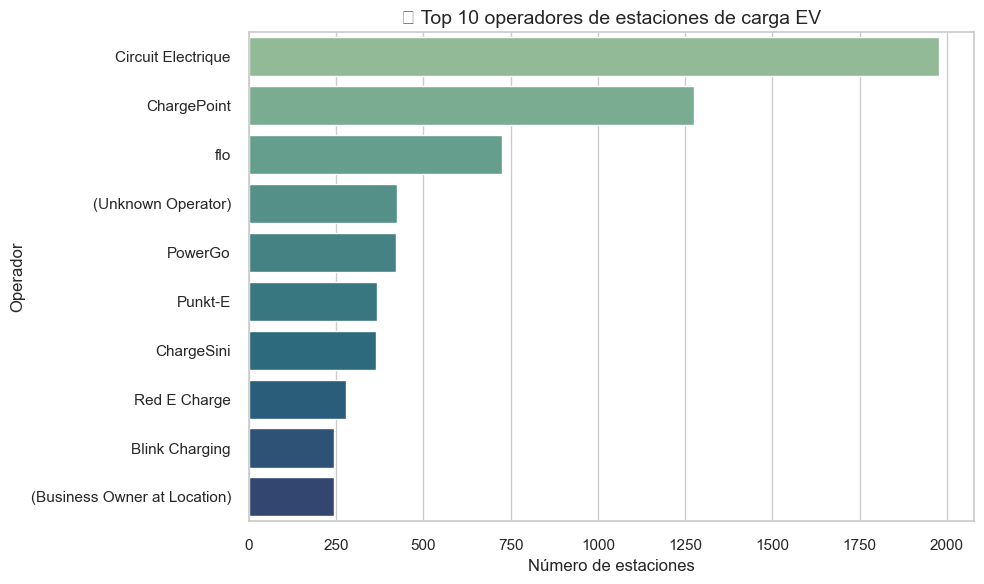

In [33]:

# 2. Principales operadores a nivel mundial


top_operators = df['operator'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette="crest")
plt.title("🏢 Top 10 operadores de estaciones de carga EV", fontsize=14)
plt.xlabel("Número de estaciones")
plt.ylabel("Operador")
plt.tight_layout()
plt.show()


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1592829324.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=connectors_by_country.values, y=connectors_by_country.index, palette="rocket")
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1592829324.py:18: UserWarning: Glyph 9881 (\N{GEAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\1592829324.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9881 (\N{GEAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from

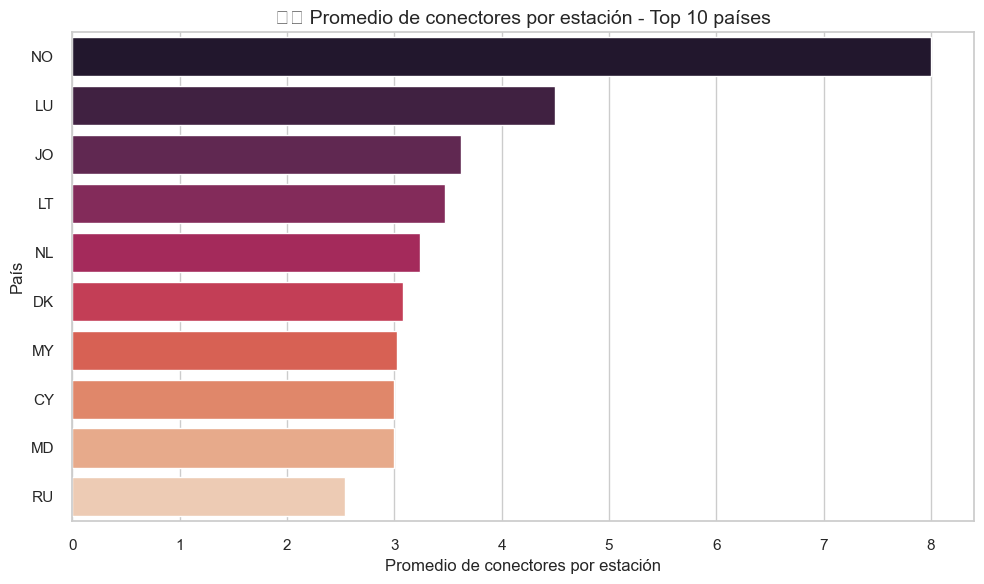

In [34]:

# 3. Capacidad promedio (número de conectores) por país


df['num_connectors'] = pd.to_numeric(df['num_connectors'], errors='coerce')

connectors_by_country = (
    df.groupby('country')['num_connectors']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=connectors_by_country.values, y=connectors_by_country.index, palette="rocket")
plt.title("⚙️ Promedio de conectores por estación - Top 10 países", fontsize=14)
plt.xlabel("Promedio de conectores por estación")
plt.ylabel("País")
plt.tight_layout()
plt.show()


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\3526358757.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_connectors.values, y=top_connectors.index, palette="mako")
C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\3526358757.py:15: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


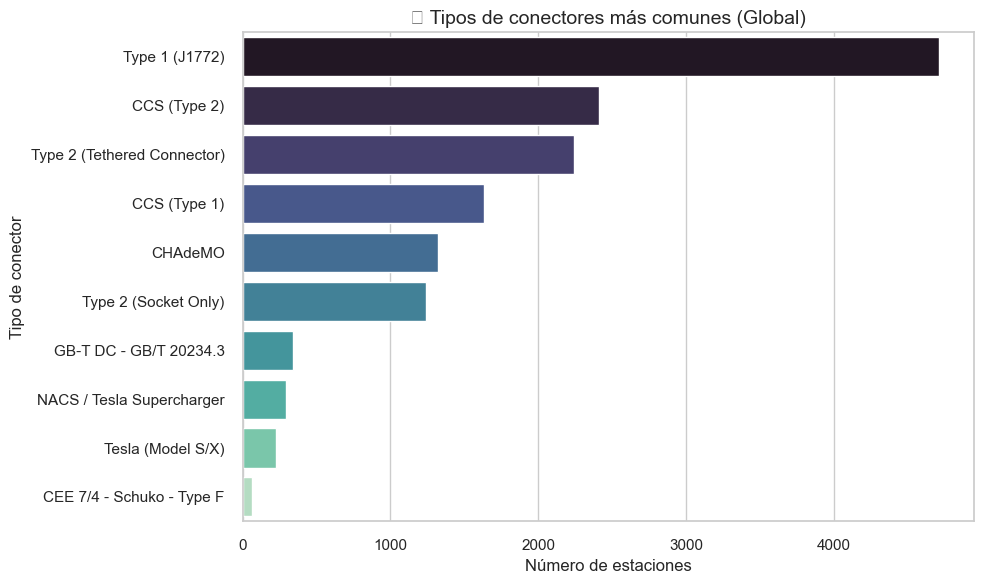

In [35]:

# 4. Tipos de conectores más comunes (global)


df['connector_types'] = df['connector_types'].fillna('Unknown')
connectors_expanded = df.assign(connector=df['connector_types'].str.split('|')).explode('connector')
connectors_expanded['connector'] = connectors_expanded['connector'].str.strip()

top_connectors = connectors_expanded['connector'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_connectors.values, y=top_connectors.index, palette="mako")
plt.title("🔌 Tipos de conectores más comunes (Global)", fontsize=14)
plt.xlabel("Número de estaciones")
plt.ylabel("Tipo de conector")
plt.tight_layout()
plt.show()


In [36]:

# 5. Mapa global de estaciones de carga EV


m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")


sample_df = df.sample(n=1000, random_state=42)

for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        popup=f"{row['title']}<br>{row['operator']}<br>{row['country']}",
        color="blue",
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

m.save("mapa_global_ev_stations.html")
print(" Mapa generado: abre 'mapa_global_ev_stations.html' en tu navegador para visualizarlo.")


 Mapa generado: abre 'mapa_global_ev_stations.html' en tu navegador para visualizarlo.


C:\Users\JG Fabio\AppData\Local\Temp\ipykernel_9200\2294638009.py:9: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\JG Fabio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


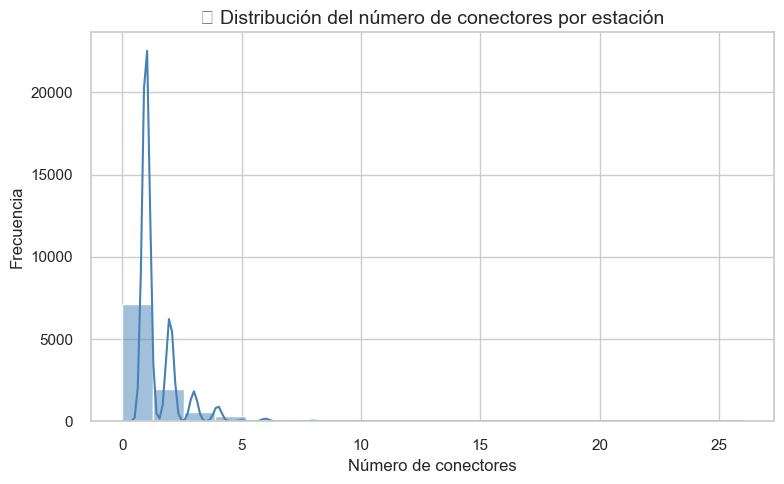

In [37]:

# 6. Distribución del número de conectores por estación


plt.figure(figsize=(8,5))
sns.histplot(df['num_connectors'].dropna(), bins=20, kde=True, color="steelblue")
plt.title("🔢 Distribución del número de conectores por estación", fontsize=14)
plt.xlabel("Número de conectores")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
